**Importing the Libraries**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [5]:
!pip install MiniSom

  Created wheel for MiniSom: filename=MiniSom-2.2.6-cp36-none-any.whl size=8525 sha256=2067539487e46da4198a57c15d5bc782664c07f6a6ad0a170b1efd3e9c423c27
  Stored in directory: /root/.cache/pip/wheels/b8/c6/01/330066e36e1f7c826c96f656f9185822cfcdef0591315949ea
Successfully built MiniSom


**Importing the Dataset**

In [6]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

**Feature Scaling**

In [7]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

**Training the SOM**

In [8]:
from minisom import MiniSom
som = MiniSom(x=10,y=10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)



**Visualizing the Results**

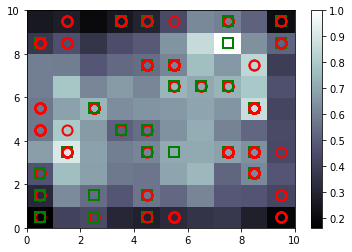

In [9]:
from pylab import bone, pcolor, colorbar, plot , show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o','s']
colors = ['r','g']
for i,x in enumerate(X):
  w = som.winner(x)
  plot(w[0]+0.5,
       w[1]+0.5,
       markers[y[i]],
       markeredgecolor = colors[y[i]],
       markerfacecolor = 'None',
       markersize = 10,
       markeredgewidth = 2)
show() 

**Finding the Frauds**

In [12]:
mappings = som.win_map(X)
frauds = mappings[(7,8)]

In [13]:
frauds = sc.inverse_transform(frauds)

In [14]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15790113
